# Linear Algebra and its Applications
## Assignment 5


Name - Anjan Mondal

Roll Number- MDS202208

## Import all prerequisites

In [1]:
from helper_functions import *
import time
import scipy as sp
import pandas as pd
import scipy.linalg
from scipy.linalg import cho_factor, cho_solve, cholesky
import matplotlib.pyplot as plt

## Initialization

Initialization of all data structures for storing the following:
* Running time of both solvers
* Solutions $L,U,P,x \text{ or } P,G,x$ and the chosen $A$ and $b$ for both solvers

In [2]:
n_list=[2,5,9,10,12,13,14,15,16,30,50,90,100]
scipy_LU_rt={} #Running times by scipy's LU factorization algorithm
my_LU_rt_gepp={}  # Running times by my implementation LU factorization algorithm
my_LU_rt_gerp={}
my_LU_rt_gecp={}
my_cholesky_rt={}
scipy_cholesky_rt={}

scipy_cholesky_rt={}
scipy_LU_subst_rt={} #Running times by scipy's Substitution algorithm
# Running times by my implementation of Substitution algorithm
my_subst_rt_gepp={}
my_subst_rt_gerp={}
my_subst_rt_gecp={}
my_cholesky_subst_rt={}

scipy_LU_solutions={}
scipy_cholesky_solutions={}
my_solutions_gepp={}
my_solutions_gerp={}
my_solutions_gecp={}
my_cholesky_solutions={}

# Execution

Execute the solvers and record the running times

In [5]:
import warnings
warnings.filterwarnings("ignore")
for n in n_list:
   
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j]=1/(i+j+1)   
    b=np.random.rand(n)
    
    #Partial Pivoting
    start_time = time.time()
    L,U,P,Q=LU_factorize_partial(A)
    my_LU_rt_gepp[n]=time.time()-start_time
    
    
    start_time=time.time()
    x=substitution(L,U,P,Q,b)
    my_subst_rt_gepp[n]=time.time()-start_time
    my_solutions_gepp[n]=(L,U,P,Q,x,A,b)
    
    #Rook Pivoting
    start_time = time.time()
    L,U,P,Q=LU_factorize_rook(A)
    my_LU_rt_gerp[n]=time.time()-start_time
    
    
    start_time=time.time()
    x=substitution(L,U,P,Q,b)
    my_subst_rt_gerp[n]=time.time()-start_time
    my_solutions_gerp[n]=(L,U,P,Q,x,A,b)
    
    #Complete Pivoting
    start_time = time.time()
    L,U,P,Q=LU_factorize_complete(A)
    my_LU_rt_gecp[n]=time.time()-start_time
    
    
    start_time=time.time()
    x=substitution(L,U,P,Q,b)
    my_subst_rt_gecp[n]=time.time()-start_time
    my_solutions_gecp[n]=(L,U,P,Q,x,A,b)
    
    #My Cholesky LU Solver
    start_time = time.time()
    G,P=my_cholesky(A)
    my_cholesky_rt[n]=time.time()-start_time
    
    
    start_time=time.time()
    x=substitution(G,G.transpose(),P,P.transpose(),b)
    my_cholesky_subst_rt[n]=time.time()-start_time
    my_cholesky_solutions[n]=(G,P,x,A,b)
    
    
    #Scipy LU Solver
    start_time=time.time()
    p, l, u = sp.linalg.lu(A) # The decomposition is A=plu
    scipy_LU_rt[n]=time.time()-start_time
    
    
    
    lu, piv = sp.linalg.lu_factor(A)
    start_time=time.time()
    x2 = sp.linalg.lu_solve((lu, piv), b)
    scipy_LU_subst_rt[n]=time.time()-start_time
    
    
    scipy_LU_solutions[n]=(l,u,p,x2,A,b)
    
    
    #Scipy Cholesky Solver
    start_time=time.time()
    try:
        L = cholesky(A, lower=True)
        scipy_cholesky_rt[n]=time.time()-start_time
    except:
        L=np.NaN
    try:
        c, low = cho_factor(A)
        x = cho_solve((c, low), b)
    except:
        x=np.NaN
    
    
    scipy_cholesky_solutions[n]=(L,x,A,b)

## Calculate Norms

Calculate the norms of $PA-LU$ and $Ax_0-b$ using all solvers.

In [6]:
my_PA_LU_norms_gepp={}
my_PA_LU_norms_gerp={}
my_PA_LU_norms_gecp={}
my_cholesky_GG_norms={}
scipy_PA_LU_norms={}
scipy_cholesky_GG_norms={}

my_Ax_b_norms_gepp={}
my_Ax_b_norms_gerp={}
my_Ax_b_norms_gecp={}
my_cholesky_AX_b_norms={}
scipy_Ax_b_norms={}
scipy_cholesky_AX_b_norms={}

for n in n_list:
    #Partial Pivoting Norms
    L,U,P,Q,x,A,b=my_solutions_gepp[n]
    my_PA_LU_norms_gepp[n]=np.linalg.norm(np.matmul(P,A@Q)-np.matmul(L,U),ord=2)
    my_Ax_b_norms_gepp[n]=np.linalg.norm(np.matmul(A,x)-b)
    
    
    #Rook Pivoting Norms
    L,U,P,Q,x,A,b=my_solutions_gerp[n]
    my_PA_LU_norms_gerp[n]=np.linalg.norm(np.matmul(P,A@Q)-np.matmul(L,U),ord=2)
    my_Ax_b_norms_gerp[n]=np.linalg.norm(np.matmul(A,x)-b,ord=2)
        
    #Complete Pivoting Norms
    L,U,P,Q,x,A,b=my_solutions_gecp[n]
    my_PA_LU_norms_gecp[n]=np.linalg.norm(np.matmul(P,A@Q)-np.matmul(L,U),ord=2)
    my_Ax_b_norms_gecp[n]=np.linalg.norm(np.matmul(A,x)-b,ord=2)
    
    #Cholesky Norms
    G,P,x,A,b=my_cholesky_solutions[n]
    try:
        my_cholesky_GG_norms[n]=np.linalg.norm(G@(G.transpose())-P@A@(P.transpose()),ord=2)
        my_cholesky_AX_b_norms[n]=np.linalg.norm(np.matmul(A,x)-b,ord=2)
    except:
        my_cholesky_GG_norms[n]=np.NaN
        my_cholesky_AX_b_norms[n]=np.NaN
    #Scipy LU Norms
    L,U,P,x,A,b=scipy_LU_solutions[n]
    scipy_PA_LU_norms[n]=np.linalg.norm(A-np.matmul(P,np.matmul(L,U)),ord=2)
    scipy_Ax_b_norms[n]=np.linalg.norm(np.matmul(A,x)-b,ord=2)
    
    #Scipy Cholesky Norm
    G,x,A,b=scipy_cholesky_solutions[n]
    try:
        scipy_cholesky_GG_norms[n]=np.linalg.norm(G@(G.transpose())-A,ord=2)
        scipy_cholesky_AX_b_norms[n]=np.linalg.norm(np.matmul(A,x)-b,ord=2)
    except:
        scipy_cholesky_GG_norms[n]=np.NaN
        scipy_cholesky_AX_b_norms[n]=np.NaN

## Norms Table

This table gives us the the matrix norms of $PA-LU$(or $PAP^T-GG^T$) and $Ax_0-b$ for both solvers.

The columns labels are set as n for an $n\times n $matrix


In [7]:
matrix_norms={}
col_names=["PA-LU gepp","PA-LU gerp","PA-LU gecp","Cholesky GG(t)-PAP(t)","PA-LU SciPy","Cholesky Scipy", 
           "Ax-b gepp","Ax-b gerp","Ax-b gecp","Ax-b Cholesky","Ax-b SciPy(LU)","Ax-b Scipy(Cholesky)"]
for n in n_list:
    matrix_norms[n]=[my_PA_LU_norms_gepp[n],my_PA_LU_norms_gerp[n],my_PA_LU_norms_gecp[n],my_cholesky_GG_norms[n],
                     scipy_PA_LU_norms[n],
                     scipy_cholesky_GG_norms[n],my_Ax_b_norms_gepp[n],my_Ax_b_norms_gerp[n],
                     my_Ax_b_norms_gecp[n],my_cholesky_AX_b_norms[n],scipy_Ax_b_norms[n],
                     scipy_cholesky_AX_b_norms[n]]
norm_table=pd.DataFrame(matrix_norms, index=col_names)

In [8]:
display(norm_table.iloc[:,:6])

,2,5,9,10,12,13
PA-LU gepp,0.000000,2.775558e-17,5.173899e-17,4.913042e-17,6.261478e-17,5.871185e-17
PA-LU gerp,0.000000,2.775558e-17,5.173899e-17,4.913042e-17,6.261478e-17,5.871185e-17
PA-LU gecp,0.000000,4.490946e-17,5.973831e-17,5.093450e-17,6.702340e-17,4.303850e-17
Cholesky GG(t)-PAP(t),0.000000,1.340158e-16,6.700789e-17,1.190237e-16,2.262175e-16,NaN
PA-LU SciPy,0.000000,2.775558e-17,4.033996e-17,1.962616e-17,5.160349e-17,5.722031e-17
Cholesky Scipy,0.000000,0.000000e+00,2.504924e-17,2.715048e-17,3.359559e-17,3.301474e-17
Ax-b gepp,0.000000,1.901657e-12,3.618864e-06,2.965031e-05,8.466475e-03,9.488734e-01
Ax-b gerp,0.000000,1.901657e-12,3.618864e-06,2.965031e-05,8.466475e-03,9.488734e-01
Ax-b gecp,0.000000,4.623118e-12,5.181760e-06,2.286102e-05,5.828233e-03,1.272643e+00
Ax-b Cholesky,0.105849,8.178088e-02,2.998494e-01,6.461434e-01,7.405266e-01,NaN


In [9]:
display(norm_table.iloc[:,6:])

,14,15,16,30,50,90,100
PA-LU gepp,5.330853e-17,6.062295e-17,5.949965e-17,6.744857e-17,7.113867e-17,7.323909e-17,7.514532e-17
PA-LU gerp,5.330853e-17,6.062295e-17,5.949965e-17,6.720375e-17,7.103216e-17,7.328106e-17,7.512948e-17
PA-LU gecp,4.908086e-17,4.865046e-17,5.244584e-17,7.322928e-17,7.438936e-17,8.073525e-17,7.406866e-17
Cholesky GG(t)-PAP(t),NaN,NaN,NaN,NaN,NaN,NaN,NaN
PA-LU SciPy,5.481817e-17,5.934849e-17,6.081652e-17,6.448746e-17,6.896413e-17,7.237879e-17,7.217933e-17
Cholesky Scipy,3.184169e-17,NaN,NaN,NaN,NaN,NaN,NaN
Ax-b gepp,1.418014e+01,1.395668e+00,6.353899e+00,3.087226e+01,3.828336e+01,3.342325e+01,1.049793e+02
Ax-b gerp,1.418014e+01,1.395668e+00,6.353899e+00,3.991581e+01,3.926930e+01,4.062674e+01,1.151213e+02
Ax-b gecp,5.594126e+01,2.096839e+00,4.985956e+00,1.357073e+02,6.260920e+01,4.531907e+01,1.601584e+02
Ax-b Cholesky,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A is a Hilbert matrix and it ceases to be positive definite after $n=14$. Thus, after $n=14$, Cholesky decompositon doesn't work on A and we get $NaN$ values.

## Condition Number

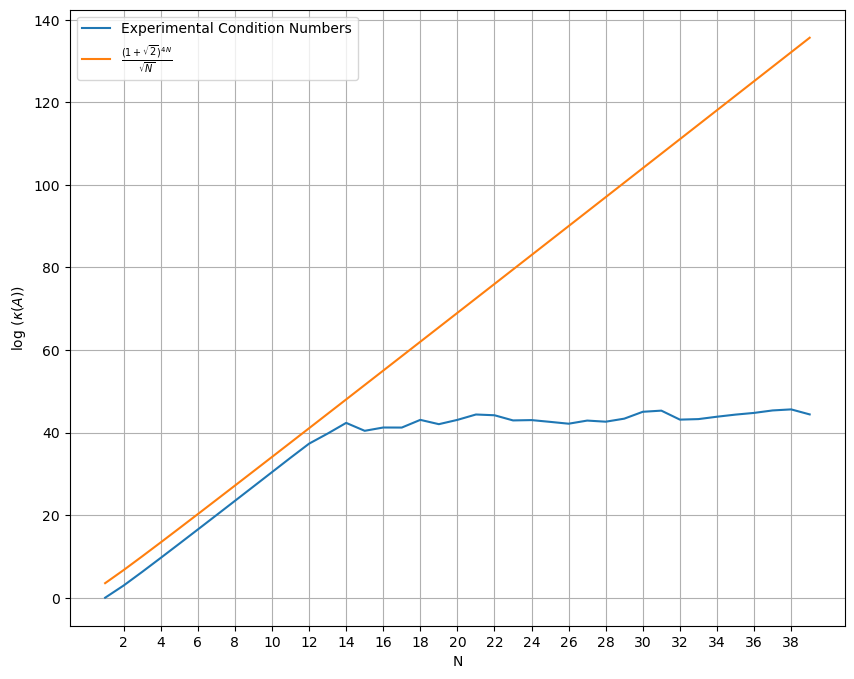

In [10]:
conds=[]
bounds=[]
n_list=np.arange(1,40)
for n in n_list:
    A=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            A[i,j]=1/(i+j+1)   
    cond=np.linalg.norm(A)*np.linalg.norm(np.linalg.inv(A))
    conds.append(cond)
    bounds.append(((1+np.sqrt(2))**(4*n))/np.sqrt(n))
    
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.plot(n_list,np.log(conds),label ='Experimental Condition Numbers')
plt.plot(n_list,np.log(bounds),label =r'$\frac{(1+\sqrt{2})^{4N}}{\sqrt{N}}$')
plt.xlabel('N')
plt.ylabel('log ($\kappa (A)$)')
plt.xticks(2*n_list[:int(n/2)])
plt.legend()
plt.grid()

In the above graph, we plot the experimental condition number along with the value $\frac{(1+\sqrt{2})^{4N}}{\sqrt{N}}$.

We can say that the for upto $n=14$, the condition number has the bound $ O\left( \frac{(1+\sqrt{2})^{4N}}{\sqrt{N}} \right)$ but beyond $n=14$ calculating the condition numbers involves a lot of round off errors and thus stagnates.


Still we can say, that $ O\left( \frac{(1+\sqrt{2})^{4N}}{\sqrt{N}} \right)$ is a resaonable bound on the condition number as the experimental values are below the curve.




# References

<ol>
  <li><em>Beckermann, B. (2000). The condition number of real Vandermonde, Krylov and positive definite Hankel matrices. Numerische Mathematik, 85(4), 553–577. doi:10.1007/pl00005392 </em></li>
  <li><em>Todd, J. "The condition of the finite segments of the Hilbert matrix, NBS Appl." Math. Ser 39 (1954): 109-116.</em></li>

</ol> 